We continue our genre classification project by exploring our dataset, variables, and relationships we can find. Let's get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#from library.sb_utils import save_file

Let's load out our dataframe and make sure all the values are as they should be. Also, we have to add time_signature back in here as it was left out of the last file upload!

In [2]:
song_data = pd.read_csv('~/Documents/SpringboardNew/song_data2.csv')
timesig = pd.read_csv('~\Documents\SpringboardNew\song_data.csv').time_signature
song_data['time_signature'] = np.array(timesig)
song_data

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre,time_signature
0,Ferrari,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House,4
1,Baby Don't Hurt Me,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House,4
2,Miss You,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House,4
3,I'm Good (Blue),0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House,4
4,The Motto,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Better Time,0.793,0.440,7,28.365,1,0.0370,0.23400,0.000373,0.0875,0.187,120.023,196062,Electro,4
396,Take My Love,0.672,0.955,8,28.234,0,0.0434,0.00626,0.518000,0.2700,0.255,126.020,194286,Electro,4
397,Good Life - feat. mimiko,0.680,0.841,0,27.970,1,0.0395,0.00562,0.000081,0.1420,0.190,123.029,227562,Electro,4
398,All or Nothing,0.616,0.869,11,29.836,1,0.0584,0.04360,0.000002,0.0803,0.286,128.050,183750,Electro,4


In [3]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         400 non-null    object 
 1   danceability      400 non-null    float64
 2   energy            400 non-null    float64
 3   key               400 non-null    int64  
 4   loudness          400 non-null    float64
 5   mode              400 non-null    int64  
 6   speechiness       400 non-null    float64
 7   acousticness      400 non-null    float64
 8   instrumentalness  400 non-null    float64
 9   liveness          400 non-null    float64
 10  valence           400 non-null    float64
 11  tempo             400 non-null    float64
 12  duration_ms       400 non-null    int64  
 13  Genre             400 non-null    object 
 14  time_signature    400 non-null    int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 47.0+ KB


In [4]:
song_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.618153,0.805326,5.627500,27.402418,0.50750,0.089439,0.109667,0.403297,0.210025,0.356754,128.788302,233788.350000,3.925000
std,0.139075,0.169920,3.567992,4.025589,0.50057,0.088676,0.214185,0.393832,0.165129,0.239077,22.353645,88106.124875,0.424057
min,0.000000,0.008980,0.000000,1.797000,0.00000,0.000000,0.000004,0.000000,0.037400,0.000000,52.581000,37627.000000,0.000000
25%,0.537500,0.730750,2.000000,25.668000,0.00000,0.040675,0.002570,0.000895,0.098525,0.153500,121.965500,177003.250000,4.000000
50%,0.622500,0.857500,6.000000,27.976000,1.00000,0.056300,0.019750,0.284500,0.137000,0.330500,129.982000,220482.000000,4.000000
75%,0.713250,0.929250,9.000000,29.714500,1.00000,0.096525,0.077925,0.834000,0.276500,0.532500,138.009000,275703.250000,4.000000
max,0.950000,0.998000,11.000000,36.185000,1.00000,0.662000,0.995000,0.978000,0.932000,0.969000,200.034000,584586.000000,5.000000


Let's go ahead and drop the song_name column for now.

In [5]:
song_data = song_data.drop('song_name', axis=1)

In [6]:
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre,time_signature
0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House,4
1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House,4
2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House,4
3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House,4
4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House,4


Let's take a look at those distributions again:

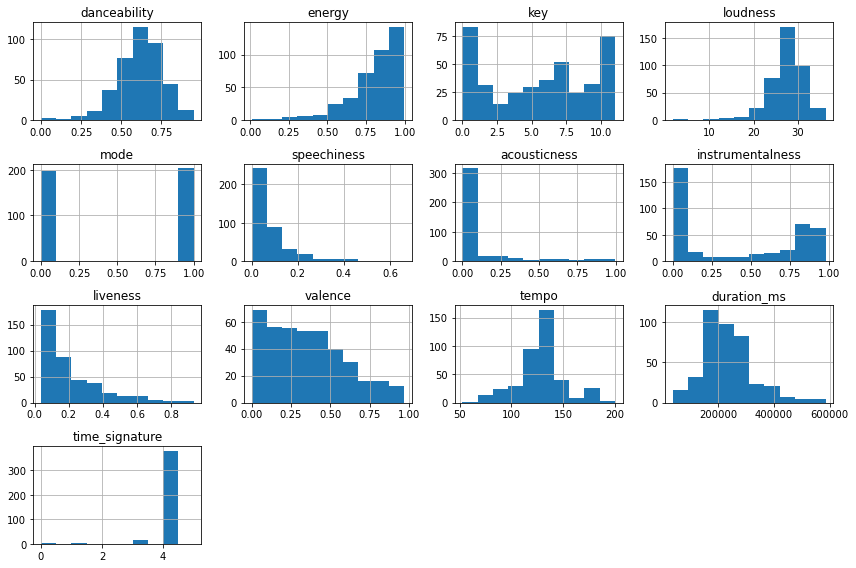

In [7]:
song_data.hist(figsize=(12,8))
plt.tight_layout()
plt.show();

At a glance, acousticness doesn't yet appear to be a particularly useful feature, nor does speechiness. Mode is interesting -this describes whether the song is in major or minor key, and I wouldn't have expected such an even split overall, but one side or another will likely be favored when split by genre. <br><br>
Of note, it looks like there's a problem with the key bins - I'll need to specify the bins for the correct number of values.

In [8]:
song_data.key.unique()

array([ 1,  7,  6,  3,  2,  8, 10, 11,  9,  5,  4,  0], dtype=int64)

In [9]:
song_data.key.value_counts()

1     55
7     52
11    41
6     36
10    34
9     32
2     31
5     29
0     28
8     24
4     24
3     14
Name: key, dtype: int64

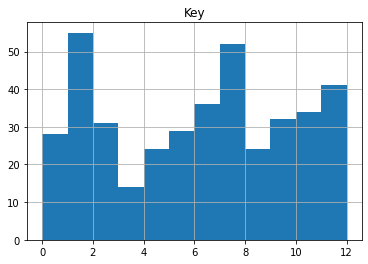

In [10]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
song_data.key.hist(bins=bins)
plt.title('Key')
plt.show()

There we go. 0 starts at C, and 11 ends at B. It appears C# and G are the most frequently used keys, and D# and G# are the least frequently used.
<br><br>
Time to make a groupby table! Let's get a sense of how the averages of these values compare.

In [11]:
genre_groups = song_data.groupby(['Genre']).mean()

In [12]:
genre_groups

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Genre,,,,,,,,,,,,,
DnB,0.70760,0.878940,6.82,30.72872,0.42,0.163608,0.059631,0.249665,0.265664,0.475516,143.21862,263688.60,4.00
Dubstep,0.55856,0.913400,5.74,31.26718,0.62,0.143646,0.026219,0.179782,0.260192,0.294940,126.86418,236652.76,3.80
Electro,0.65856,0.768140,4.98,27.51778,0.54,0.087768,0.167564,0.100602,0.186278,0.382472,127.60048,177859.34,3.98
House,0.69992,0.804260,5.62,28.74906,0.42,0.072272,0.080469,0.047708,0.220778,0.510180,123.95394,172111.94,4.00
IDM,0.55748,0.557788,5.24,21.17896,0.66,0.066048,0.414494,0.729541,0.173818,0.346836,117.83316,253969.40,3.66
Synthwave,0.53652,0.771460,5.16,26.65338,0.46,0.053012,0.036351,0.609586,0.162572,0.330346,120.67400,265798.14,4.00
Techno,0.68878,0.863940,6.02,26.31964,0.58,0.081080,0.072303,0.784100,0.173744,0.209824,135.74386,282792.72,3.98
Trance,0.53780,0.884680,5.44,26.80462,0.36,0.048076,0.020302,0.525394,0.237156,0.303920,134.41818,217433.90,3.98


As expected, we have some features that show decent differentiation between features! Instrumentalness appears to vary quite a bit, and from what I know about tempo and genre, there's bound to be some strong predictive power.

In [13]:
#plt.subplot(211)
#plt.bar(genre_groups.index, genre_groups['danceability'], label = 'danceability')
#plt.legend(loc = 'best')
#plt.subplot(212)
#plt.bar(genre_groups.index, genre_groups['energy'], label = 'e')
#plt.legend(loc = 'best')


In [14]:
#ax1 = plt.subplot(421)
#ax1.bar(genre_groups.index, genre_groups['danceability'], width=0.5, color='b', align='center')
#ax1.set_title('Danceability')
#plt.xticks(rotation=90)
#ax2 = plt.subplot(422)
#ax2.bar(genre_groups.index, genre_groups['energy'], width=0.5, color='g', align='center')
#ax2.set_title('Energy')
#plt.xticks(rotation=90)
#ax3 = plt.subplot(423)
#ax3.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#ax8 = plt.subplot(424)
#ax8.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#ax7 = plt.subplot(425)
#ax7.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#a#x6 = plt.subplot(426)
#ax6.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#ax5 = plt.subplot(427)
#ax5.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#ax4 = plt.subplot(428)
#ax4.bar(genre_groups.index, genre_groups['key'], width=0.5, color='r', align='center')
#plt.xticks(rotation=90)
#ax.bar(x+0.2, k, width=0.2, color='r', align='center')

#plt.tight_layout()
#plt.figure(figsize=(15,10))
#plt.tight_layout()
#plt.figure(figsize=(15,10))
#plt.show()

barcolors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']

Let's get a little more colorful of a look at these features by genre:

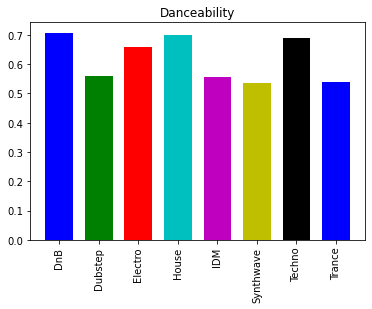

In [15]:
plt.bar(genre_groups.index, genre_groups['danceability'], width=0.7, color=barcolors, align='center')
plt.title('Average Danceability by Genre')
plt.xticks(rotation=90)
plt.show()

Danceability sets a few genres apart, some differentiation power here.

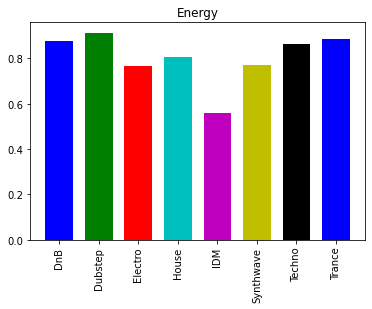

In [16]:
plt.bar(genre_groups.index, genre_groups['energy'], width=0.7, color=barcolors, align='center')
plt.title('Average Energy by Genre')
plt.xticks(rotation=90)
plt.show()

There's a bit more variety in the energy variable, and they don't seem to follow danceability trends too strongly.

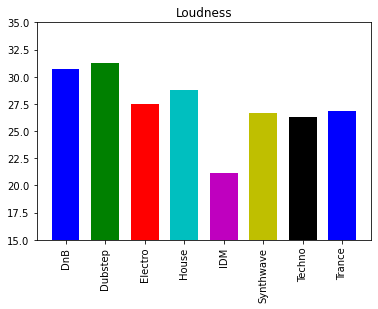

In [17]:
plt.bar(genre_groups.index, genre_groups['loudness'], width=0.7, color=barcolors, align='center')
plt.title('Average Loudness by Genre')
plt.xticks(rotation=90)
plt.ylim([15,35])
plt.show()

There is some differentiation in loudness, notably IDM.

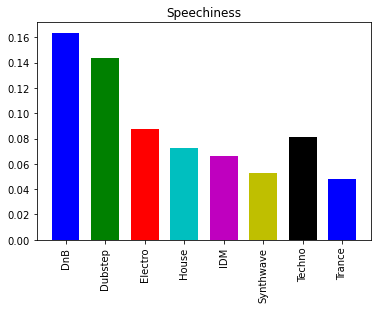

In [18]:
plt.bar(genre_groups.index, genre_groups['speechiness'], width=0.7, color=barcolors, align='center')
plt.title('Average Speechiness by Genre')
plt.xticks(rotation=90)
plt.show()

So far, speechiness shows slightly more difference visually, but the variation between groups is quite low.

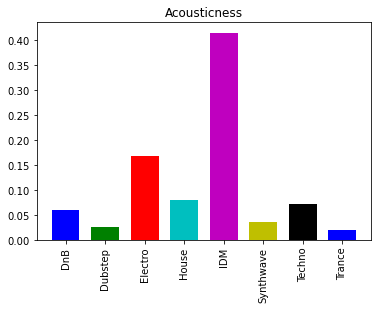

In [19]:
plt.bar(genre_groups.index, genre_groups['acousticness'], width=0.7, color=barcolors, align='center')
plt.title('Average Acousticness by Genre')
plt.xticks(rotation=90)
plt.show()

Here, acousticness seems to be a solid feature to include in our model.

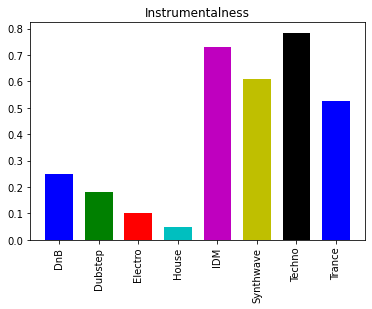

In [20]:
plt.bar(genre_groups.index, genre_groups['instrumentalness'], width=0.7, color=barcolors, align='center')
plt.title('Average Instrumentalness by Genre')
plt.xticks(rotation=90)
plt.show()

Instrumentalness also appears to be a great variable to use to differentiate genres, with the averages being all over the possible scale.

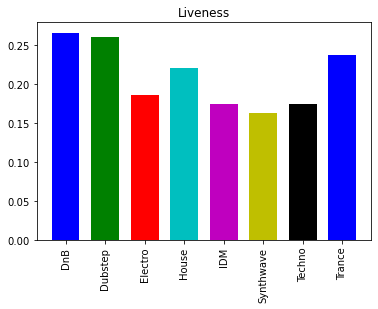

In [21]:
plt.bar(genre_groups.index, genre_groups['liveness'], width=0.7, color=barcolors, align='center')
plt.title('Average Liveness by Genre')
plt.xticks(rotation=90)
plt.show()

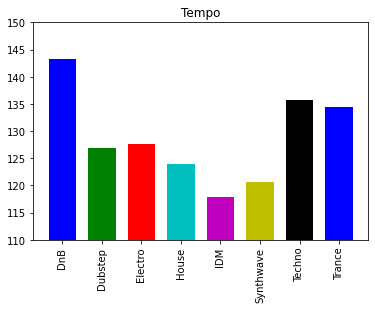

In [22]:
plt.bar(genre_groups.index, genre_groups['tempo'], width=0.7, color=barcolors, align='center')
plt.title('Average Tempo by Genre')
plt.xticks(rotation=90)
plt.ylim([110, 150])
plt.show()

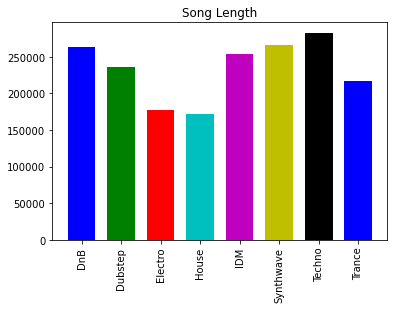

In [23]:
plt.bar(genre_groups.index, genre_groups['duration_ms'], width=0.7, color=barcolors, align='center')
plt.title('Average Song Length by Genre')
plt.xticks(rotation=90)
plt.show()

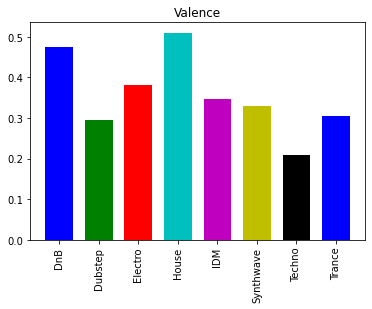

In [24]:
plt.bar(genre_groups.index, genre_groups['valence'], width=0.7, color=barcolors, align='center')
plt.title('Average Valence by Genre')
plt.xticks(rotation=90)
plt.show()

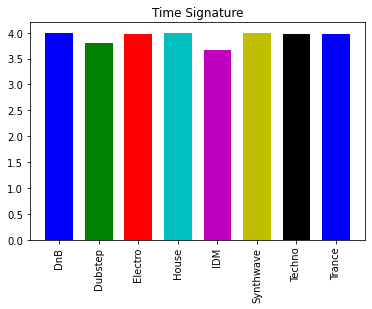

In [25]:
plt.bar(genre_groups.index, genre_groups['time_signature'], width=0.7, color=barcolors, align='center')
plt.title('Average Time Signature by Genre')
plt.xticks(rotation=90)
plt.show()

Overall, some features seem to be stronger than others for differentiation based solely on means. Let's check a more detailed distribution now via histogram, so we can see outliers, quartile data, and get a sense of variance too.

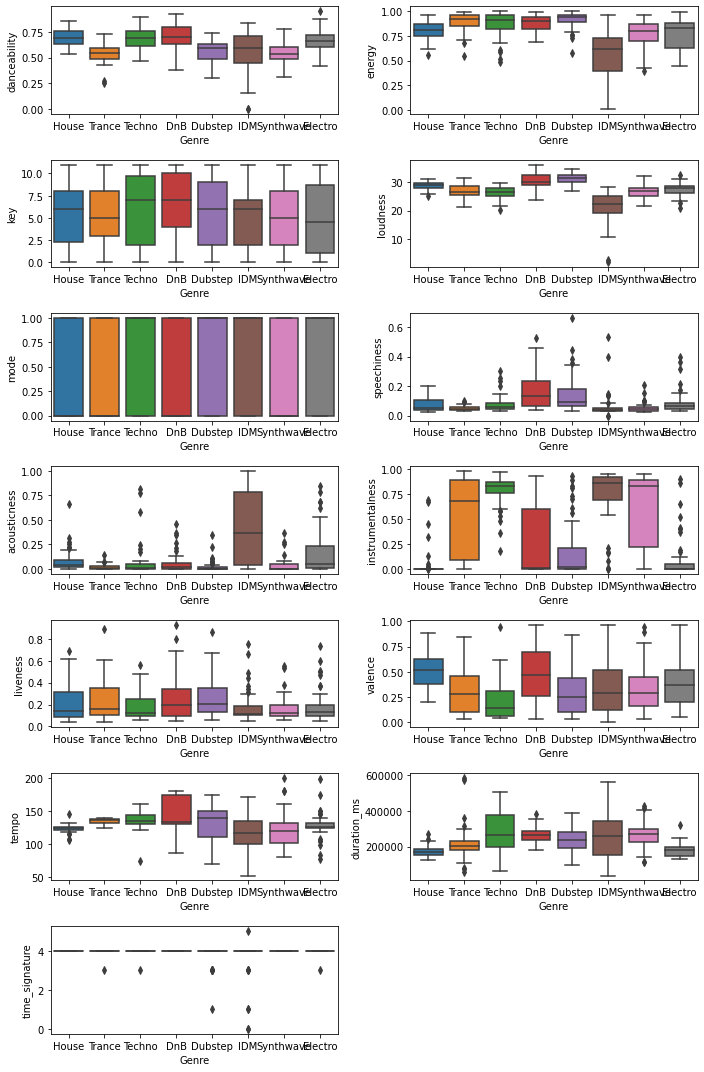

In [50]:
fig, axes = plt.subplots(7, 2, figsize=[10, 15])
variables = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
i=0
j=0
for row, var in enumerate(variables):
    if i%2 == 0:
        sns.boxplot(x='Genre', y=var, data=song_data, ax=axes[j,i])
        i+=1
        continue
    if i%2 == 1:
        sns.boxplot(x='Genre', y=var, data=song_data, ax=axes[j,i])
        j+=1
        i-=1
plt.tight_layout()
fig.delaxes(axes[6,1])
plt.show()

Here's an interesting view of what's going on. Danceability, loudness, instrumentalness, tempo, and duration appear to have fairly strong predictive potential due to the variety of clusters by genre.
<br><br>
Clearly, we need a better way to interpret mode. Also, key and time signature, while displaying some info, could be clearer. Let's check out the time signature, key, and mode, the three categorical features.

In [47]:
#song_data['key'].hist(bins=bins)
#song_data['time_signature'].value_counts().plot(kind='bar')
#plt.show()
timesig_genre = pd.pivot_table(song_data.reset_index(),index='time_signature',
                           columns='Genre', values='danceability', aggfunc='count').fillna(0).astype(int)
timesig_genre

Genre,DnB,Dubstep,Electro,House,IDM,Synthwave,Techno,Trance
time_signature,,,,,,,,
0,0,0,0,0,2,0,0,0
1,0,1,0,0,2,0,0,0
3,0,7,1,0,4,0,1,1
4,50,42,49,50,41,50,49,49
5,0,0,0,0,1,0,0,0


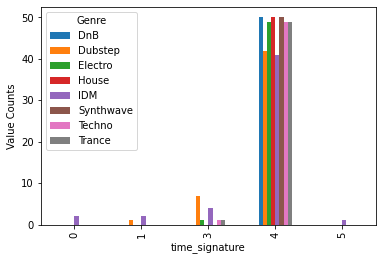

In [60]:
timesig_genre.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

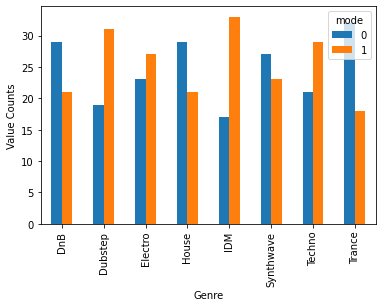

In [61]:
mode_genre = pd.pivot_table(song_data.reset_index(),index='Genre',
                           columns='mode', values='danceability', aggfunc='count').fillna(0).astype(int)
mode_genre.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

In [63]:
mode_genre.T

Genre,DnB,Dubstep,Electro,House,IDM,Synthwave,Techno,Trance
mode,,,,,,,,
0,29,19,23,29,17,27,21,32
1,21,31,27,21,33,23,29,18


In [77]:
genre

7

In [64]:
#song_data.groupby(['key', 'Genre']).count()['danceability']
#song_data.pivot(index='key', columns='Genre', values='danceability')

list_genres2 = ['House', 'Trance', 'Techno', 'DnB', 'Dubstep', 'IDM', 'Synthwave', 'Electro']
key_genre = pd.pivot_table(song_data.reset_index(),index='key',
                           columns='Genre', values='danceability', aggfunc='count').fillna(0).astype(int)

Let's take a look at the number of songs that are in each different key, categorized by genre!

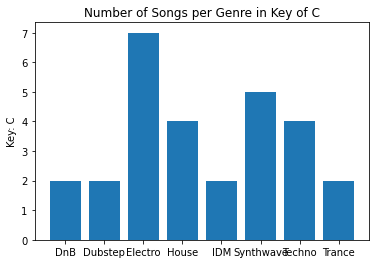

In [65]:
plt.bar(x=key_genre.columns, height=key_genre.iloc[0, :])
plt.title('Number of Songs per Genre in Key of C')
plt.ylabel('Key: C')
plt.show()

Maybe we can get a better view of this data with the key_genre pivot table we made:

In [ ]:
for genre in range(len(key_genre.columns)):
    key_genre.iloc[:, genre].plot(kind='bar')

In [31]:
key_genre

Genre,DnB,Dubstep,Electro,House,IDM,Synthwave,Techno,Trance
key,,,,,,,,
0,2,2,7,4,2,5,4,2
1,7,10,8,6,10,2,7,5
2,0,4,5,3,2,9,4,4
3,1,1,2,2,0,5,0,3
4,4,1,3,3,5,1,0,7
5,2,3,2,1,5,6,4,6
6,7,7,0,8,6,1,4,3
7,3,4,7,7,9,6,10,6
8,3,3,3,6,2,3,2,2


Cool! On a cursory glance, it appears that C sharp/D flat is a very popular key.

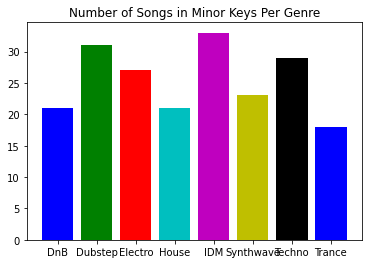

In [32]:
gens = list(song_data.groupby(['Genre'])['mode'].sum().index)
vals = list(song_data.groupby(['Genre'])['mode'].sum().values)

plt.bar(x=gens, height=vals, color=barcolors)
plt.title('Number of Songs in Minor Keys Per Genre')
plt.show()

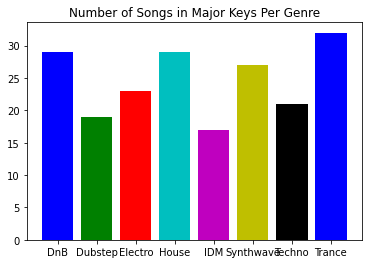

In [33]:
major = [50]*len(vals)
vals2 = np.array(major)-np.array(vals)
plt.bar(x=gens, height=(vals2), color=barcolors)
plt.title('Number of Songs in Major Keys Per Genre')
plt.show()

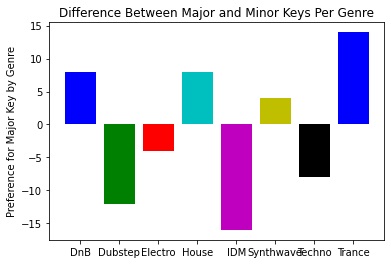

In [34]:
plt.bar(x=gens, height=(vals2-vals), color=barcolors)
plt.title('Difference Between Major and Minor Keys Per Genre')
plt.ylabel('Preference for Major Key by Genre')
plt.show()

We'll drop key on this first one, then add encoded variables after:

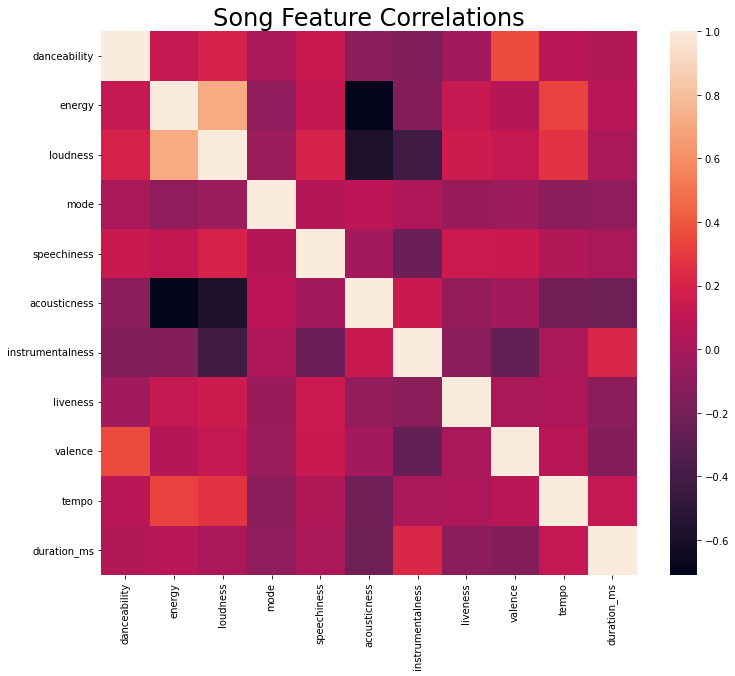

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(song_data.drop('key', axis=1).corr())
plt.title('Song Feature Correlations', fontsize=24)
plt.show()

Energy and loudness are pretty strongly correlated with each other, unsurprisingly. Looking back at the boxplots, the IQRs of loudness by genre are more narrow and differentiated than those of energy by genre. We can go ahead and drop the energy column. <br><br>

Now, let's acknowledge our categorical variables, key and mode. Since mode is a binary class and already encoded by 0/1, we shouldn't worry about getting dummies for this because it'll just create another reflexive column with an inverse correlation, introducing multicollinearity. However, For key, we'll want to get dummies since there are 12 different values.

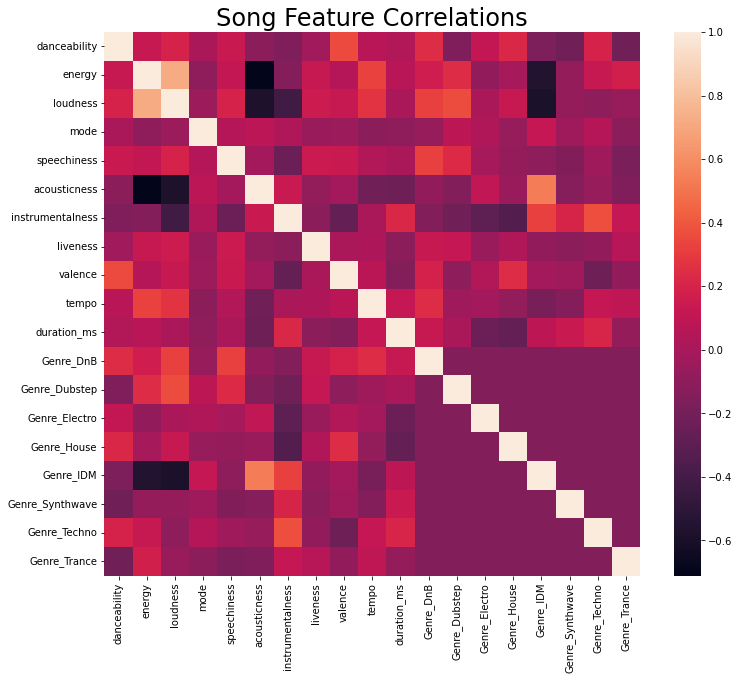

In [37]:
song_data_genredummies = pd.get_dummies(song_data.drop('key', axis=1), columns=['Genre'])

plt.figure(figsize=(12,10))
sns.heatmap(song_data_genredummies.corr())
plt.title('Song Feature Correlations', fontsize=24)
plt.show()

Notably, in the genres, we see synthwave with very lukewarm results - there is little correlation in almost every feature besides a very small positive correlation with instrumentalness and song duration.

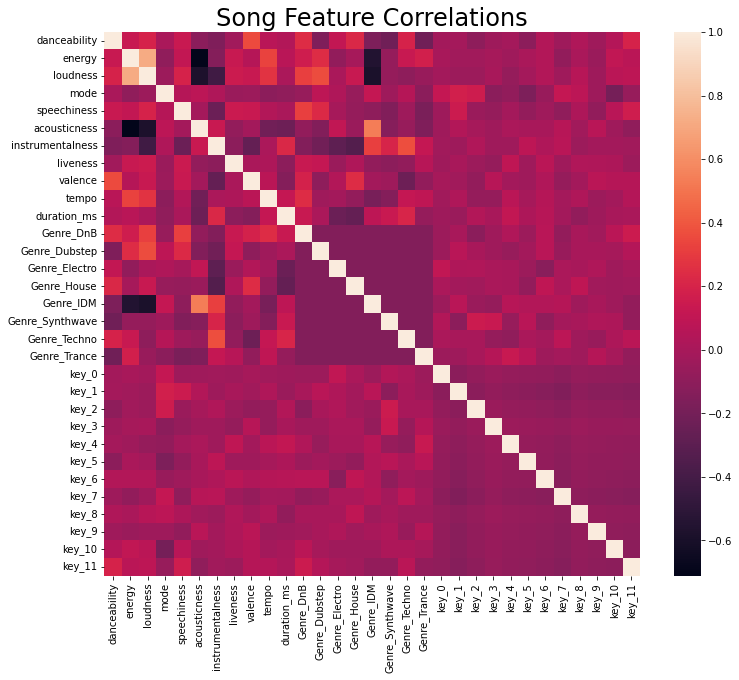

In [38]:
song_data_genredummies2 = pd.get_dummies(song_data, columns=['Genre', 'key'])

plt.figure(figsize=(12,10))
sns.heatmap(song_data_genredummies2.corr())
plt.title('Song Feature Correlations', fontsize=24)
plt.show()

Let's also take a look at loudness and energy: these appear to be quite negatively correlated, but let's get a closer look:

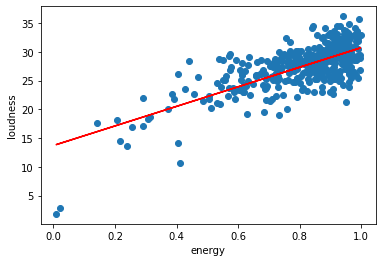

In [39]:
plt.scatter(x='energy', y='loudness', data=song_data)
plt.xlabel('energy')
plt.ylabel('loudness')

m, b = np.polyfit(song_data.energy, song_data.loudness, 1)
plt.plot(song_data.energy, m*(song_data.energy)+b, color='r')
plt.show()

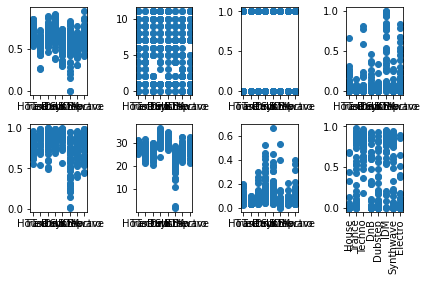

In [40]:
f, ax = plt.subplots(2, 4)
plt.xticks(rotation=90)
i=0
j=0
for feature in range(8):
    if i%2 == 0:
        ax[i][j].scatter(x=song_data.Genre, y=song_data.iloc[:, feature])
        i+=1
        continue
    if i%2 == 1:
        ax[i][j].scatter(x=song_data.Genre, y=song_data.iloc[:, feature])
        i -=1
        j +=1
plt.tight_layout()
plt.show()

In [42]:
song_data.drop('key', axis=1).corr()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.130623,0.196836,0.007778,0.137844,-0.109852,-0.161783,-0.025620,0.353239,0.069139,0.039697
energy,0.130623,1.000000,0.718402,-0.093618,0.107803,-0.710462,-0.139067,0.127826,0.051657,0.331624,0.069790
loudness,0.196836,0.718402,1.000000,-0.043004,0.192929,-0.577432,-0.417834,0.151395,0.124771,0.266193,0.017773
mode,0.007778,-0.093618,-0.043004,1.000000,0.056402,0.081294,0.024943,-0.052701,-0.045430,-0.105575,-0.091535
speechiness,0.137844,0.107803,0.192929,0.056402,1.000000,-0.012894,-0.239091,0.139279,0.135194,0.044375,0.008895
acousticness,-0.109852,-0.710462,-0.577432,0.081294,-0.012894,1.000000,0.134196,-0.077537,-0.016133,-0.210757,-0.235396
instrumentalness,-0.161783,-0.139067,-0.417834,0.024943,-0.239091,0.134196,1.000000,-0.103364,-0.267240,0.011615,0.220608
liveness,-0.025620,0.127826,0.151395,-0.052701,0.139279,-0.077537,-0.103364,1.000000,0.010262,0.023619,-0.105206
valence,0.353239,0.051657,0.124771,-0.045430,0.135194,-0.016133,-0.267240,0.010262,1.000000,0.074202,-0.140635
tempo,0.069139,0.331624,0.266193,-0.105575,0.044375,-0.210757,0.011615,0.023619,0.074202,1.000000,0.113862


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
labels = list(song_data.columns)
labels

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'Genre']

In [45]:
# Load your dataset and split it into features (X) and labels (y)
genre_to_num = [1,2,3,4,5,6,7,8]
X = song_data.drop('Genre', axis=1)
y = song_data['Genre'].replace(list_genres2, genre_to_num, inplace=False)
X = pd.get_dummies(X, columns=['key'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Print feature importances or visualize them using a plot

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, model.predict(X_test))

# Calculate permutation importance
perm_importances = []
for feature_idx in range(X_test.shape[1]):
    X_permuted = X_test.copy()
    np.random.permutation(X_permuted.iloc[feature_idx, :])
    perm_accuracy = accuracy_score(y_test, model.predict(X_permuted))
    perm_importance = baseline_accuracy - perm_accuracy
    perm_importances.append(perm_importance)

# Visualize permutation importance scores using a plot

In [47]:
y_pred = model.predict(X_test)

In [48]:
feature_importances

array([0.0940282 , 0.0881479 , 0.1336683 , 0.01468615, 0.07831707,
       0.07955258, 0.09548479, 0.05925696, 0.0670323 , 0.10785085,
       0.10644274, 0.00824517, 0.00768373, 0.00701863, 0.00324928,
       0.00434841, 0.00429816, 0.00599715, 0.00902076, 0.00376145,
       0.00786761, 0.0069676 , 0.00707423])

In [49]:
from sklearn.inspection import permutation_importance

In [86]:
#calculating permutation importances
#premu_rfr_train = permutation_importance(model, X_train, y_train)
#plt.figure(figsize=(12,8))
#plt.bar(list(X.columns), premu_rfr_train['importances_mean'])
#plt.title('Average Permutation Importance Scores by Feature, Train Data')
#plt.xticks(rotation=90)
#plt.show()

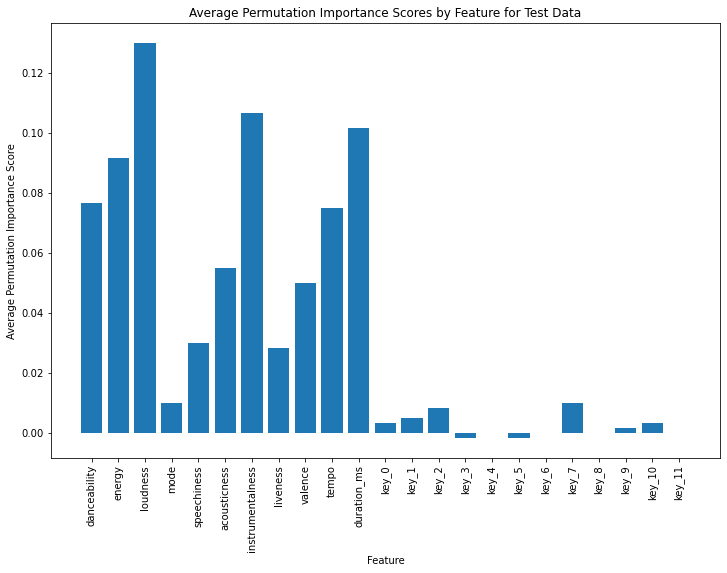

In [84]:
premu_rfr_test = permutation_importance(model, X_test, y_test)
plt.figure(figsize=(12,8))
plt.bar(list(X.columns), premu_rfr_test['importances_mean'])
plt.title('Average Permutation Importance Scores by Feature for Test Data')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

From this plot, we're able to se that most of the continuous variables are quite important for this model's predictive ability. Mode, liveness, and speechiness are the least important features for this model, so we can try eliminating some of these features and compare model performance.
<br><br>
For the key data, it's hard to compare the importance here with the rest of the variables because we turned it into dummy values. However, within the keys, it appears that key 7 (G#), key 2 (D), and key 1 (C#) are the ones that contribute the most to the model's classification system.
<br><br>
We can experiment with using some of these values in our final model, but the rest seem to give little, if any, help with predictions.

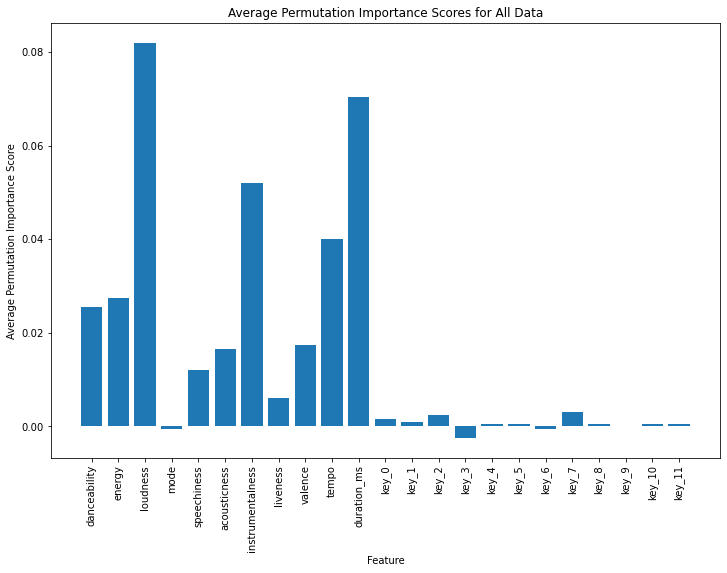

In [102]:
premu_rfr_total = permutation_importance(model, X, y, random_state=42)
plt.figure(figsize=(12,8))
plt.bar(list(X.columns), premu_rfr_total['importances_mean'])
plt.title('Average Permutation Importance Scores for All Data')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [53]:
model.score(X_test, y_test)

0.6583333333333333

In [54]:
print(f"RF train accuracy: {model.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {model.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.658


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [56]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.83      0.75        18
           2       0.73      0.58      0.65        19
           3       0.71      0.75      0.73        16
           4       0.88      0.78      0.82         9
           5       0.71      0.86      0.77        14
           6       0.69      0.69      0.69        16
           7       0.27      0.30      0.29        10
           8       0.57      0.44      0.50        18

    accuracy                           0.66       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.66      0.66      0.65       120



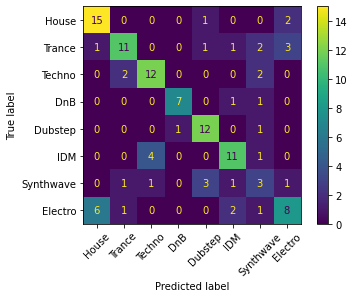

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list_genres2)
disp.plot()
plt.xticks(rotation=45)
plt.show()

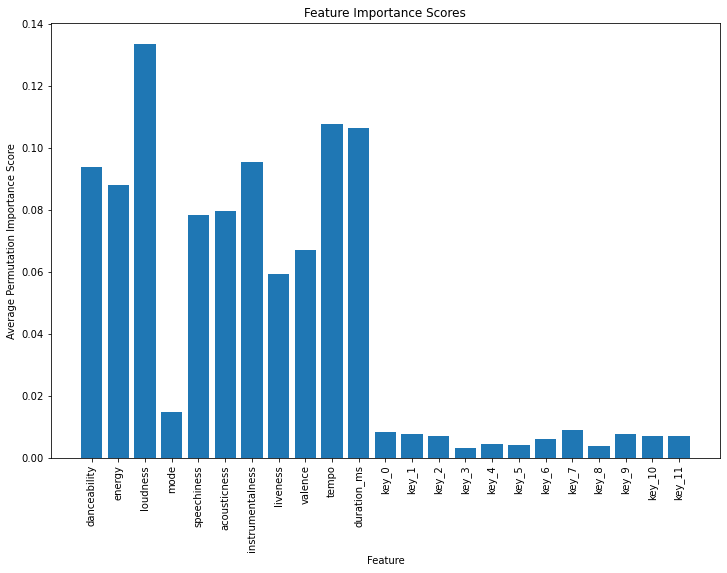

In [82]:
#premu_rfr_total = feature_importance(model, X, y, random_state=42)
plt.figure(figsize=(12,8))
plt.bar(list(X.columns), model.feature_importances_)
plt.title('Feature Importance Scores')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [59]:
genre_to_num = [1,2,3,4,5,6,7,8]
X2 = song_data.drop(['Genre', 'key', 'mode'], axis=1)
y2 = song_data['Genre'].replace(list_genres2, genre_to_num, inplace=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X_train2.shape, X_test2.shape)

(280, 10) (120, 10)


In [60]:
# Train a Random Forest classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [61]:
feature_importances = model2.feature_importances_

# Print feature importances or visualize them using a plot

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test2, model2.predict(X_test2))

y_pred2 = model2.predict(X_test2)

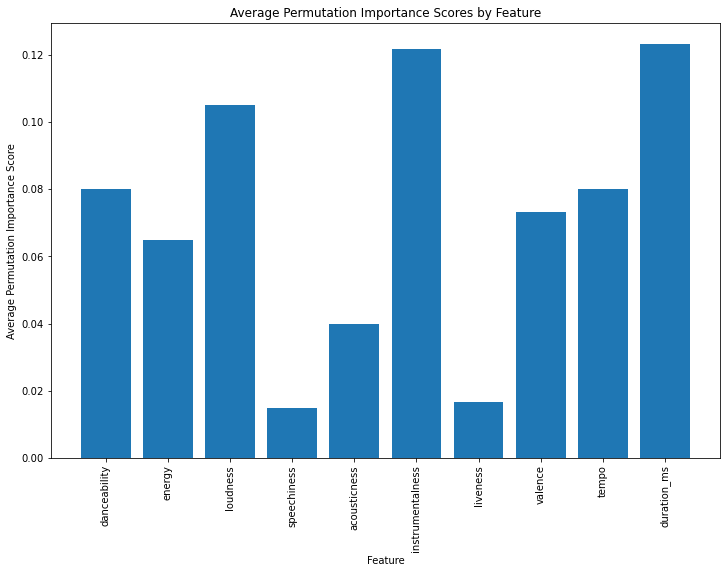

In [80]:
premu_rfr_test2 = permutation_importance(model2, X_test2, y_test2)
plt.figure(figsize=(12,8))
plt.bar(list(X2.columns), premu_rfr_test2['importances_mean'])
plt.title('Average Permutation Importance Scores by Feature')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [63]:
class_report2 = classification_report(y_test2, y_pred2)
print("Classification Report:\n", class_report2)

Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.72      0.67        18
           2       0.76      0.68      0.72        19
           3       0.75      0.75      0.75        16
           4       0.64      0.78      0.70         9
           5       0.67      0.86      0.75        14
           6       0.79      0.69      0.73        16
           7       0.22      0.20      0.21        10
           8       0.64      0.50      0.56        18

    accuracy                           0.66       120
   macro avg       0.64      0.65      0.64       120
weighted avg       0.66      0.66      0.65       120



In [97]:
genre_to_num = [1,2,3,4,5,6,7,8]
X3 = song_data.drop(['Genre', 'danceability', 'energy', 'loudness', 'acousticness',
                     'instrumentalness', 'valence', 'tempo', 'duration_ms', 'speechiness', 'liveness'], axis=1)
X3 = pd.get_dummies(X3, columns=['key'])
y3 = song_data['Genre'].replace(list_genres2, genre_to_num, inplace=False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

print(X_train3.shape, X_test3.shape)

(280, 13) (120, 13)


In [98]:
# Train a Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train3, y_train3)

RandomForestClassifier(random_state=42)

In [99]:
feature_importances = model3.feature_importances_

# Print feature importances or visualize them using a plot

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test3, model3.predict(X_test3))

y_pred3 = model3.predict(X_test3)

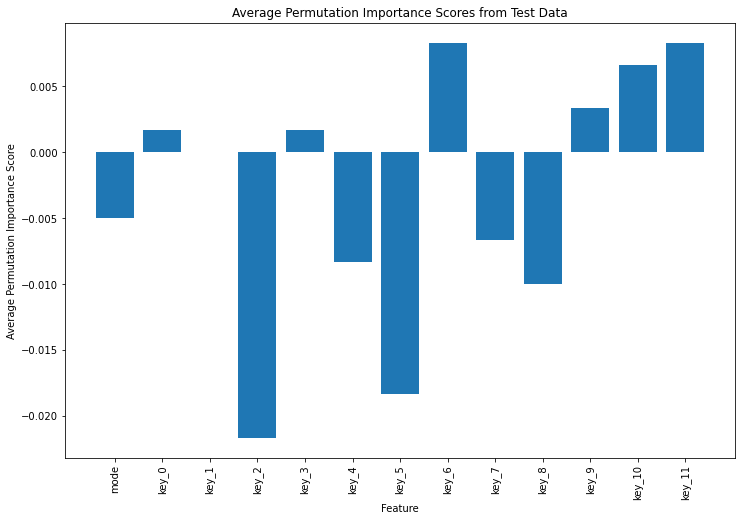

In [100]:
premu_rfr_test3 = permutation_importance(model3, X_test3, y_test3)
plt.figure(figsize=(12,8))
plt.bar(list(X3.columns), premu_rfr_test3['importances_mean'])
plt.title('Average Permutation Importance Scores from Test Data')
plt.xlabel('Feature')
plt.ylabel('Average Permutation Importance Score')
plt.xticks(rotation=90)
plt.show()

In [101]:
class_report3 = classification_report(y_test3, y_pred3)
print("Classification Report:\n", class_report3)

Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.06      0.09        18
           2       0.17      0.16      0.16        19
           3       0.00      0.00      0.00        16
           4       0.10      0.22      0.14         9
           5       0.18      0.36      0.24        14
           6       0.07      0.06      0.07        16
           7       0.05      0.10      0.07        10
           8       0.00      0.00      0.00        18

    accuracy                           0.11       120
   macro avg       0.10      0.12      0.09       120
weighted avg       0.10      0.11      0.09       120



In [69]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      400 non-null    float64
 1   energy            400 non-null    float64
 2   key               400 non-null    int64  
 3   loudness          400 non-null    float64
 4   mode              400 non-null    int64  
 5   speechiness       400 non-null    float64
 6   acousticness      400 non-null    float64
 7   instrumentalness  400 non-null    float64
 8   liveness          400 non-null    float64
 9   valence           400 non-null    float64
 10  tempo             400 non-null    float64
 11  duration_ms       400 non-null    int64  
 12  Genre             400 non-null    object 
dtypes: float64(9), int64(3), object(1)
memory usage: 40.8+ KB


In [76]:
song_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Genre
0,0.844,0.688,1,26.121,0,0.0490,0.01290,0.000054,0.0492,0.695,124.992,185662,House
1,0.602,0.910,7,30.596,1,0.0308,0.00126,0.000174,0.1200,0.228,127.944,140018,House
2,0.587,0.742,6,27.360,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,206000,House
3,0.561,0.965,7,30.327,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,House
4,0.754,0.763,7,29.373,0,0.0435,0.03010,0.000022,0.0901,0.464,117.953,164819,House


In [79]:
song_data.shape

(400, 13)

In [103]:
song_data.to_csv('~\Documents\SpringboardNew\song_data3.csv')